# Import Libary

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Data Loading

In [12]:
# ID file dari Google Drive URL
file_id = "19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO"

# Buat URL unduhan langsung
download_url = f"https://drive.google.com/uc?id={file_id}"

# Baca file CSV dari URL
data = pd.read_csv(download_url)

# Tampilkan Dataframe
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
# Cek missing values
print("\nMissing values per fitur:")
data.isnull().sum()


Missing values per fitur:


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# Hapus kolom "RowNumber", "CustomerId", dan "Surname"
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Tampilkan Datafarame
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

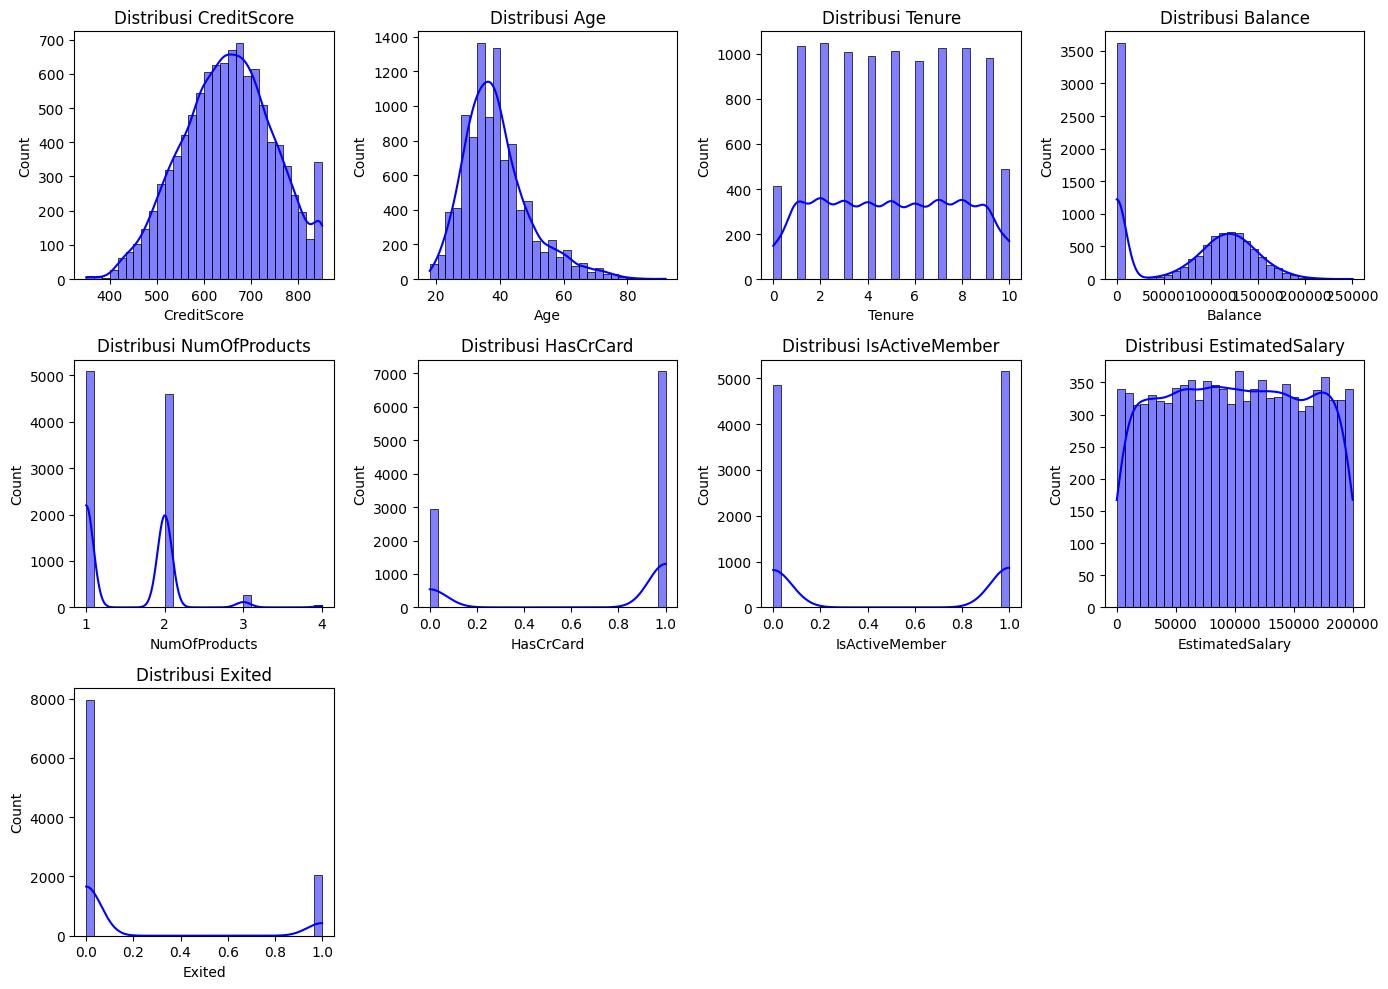

In [16]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribusi {column}")

plt.tight_layout()
plt.show()

/tmp/ipykernel_9411/3560019881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis")
/tmp/ipykernel_9411/3560019881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis")


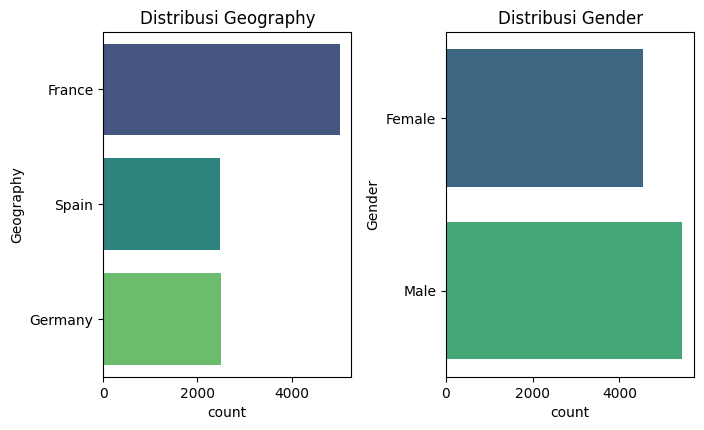

In [20]:
# Distribusi fitur kategorikal
categorical_features = data.select_dtypes(include=['object'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], palette="viridis")
    plt.title(f"Distribusi {column}")

plt.tight_layout()
plt.show()

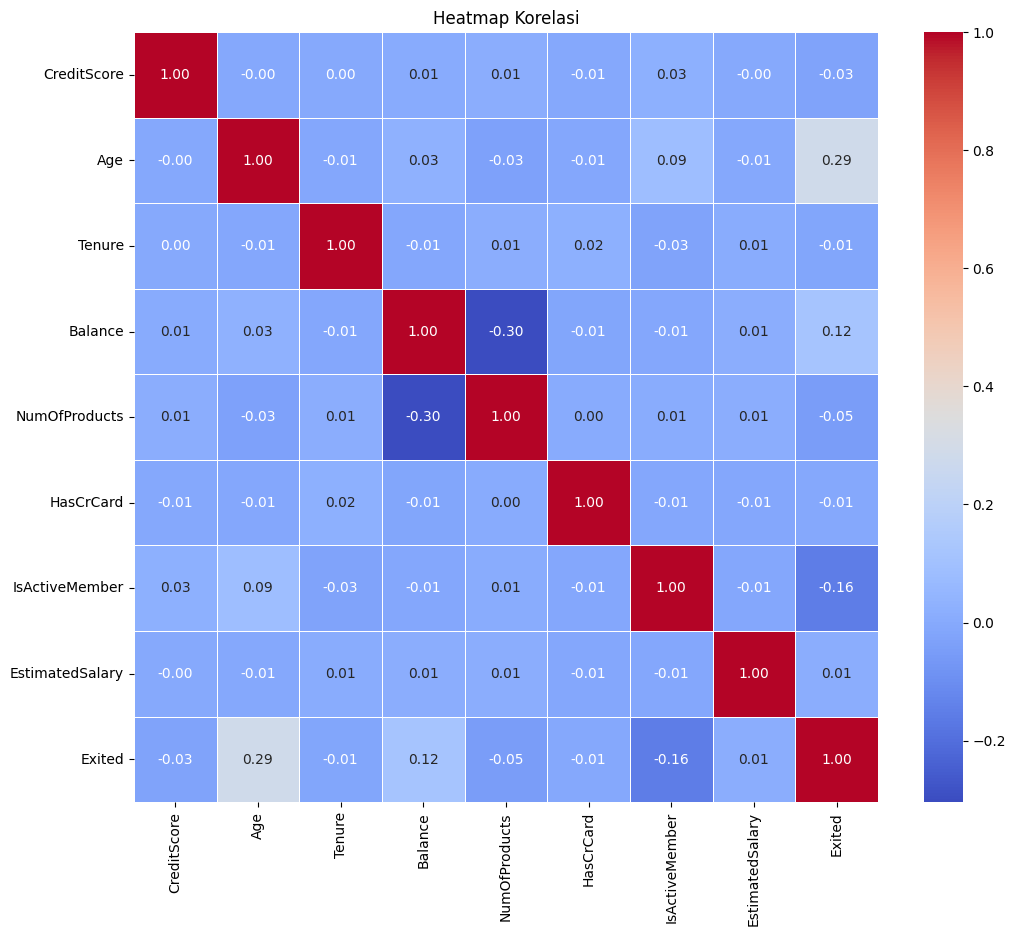

In [21]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()

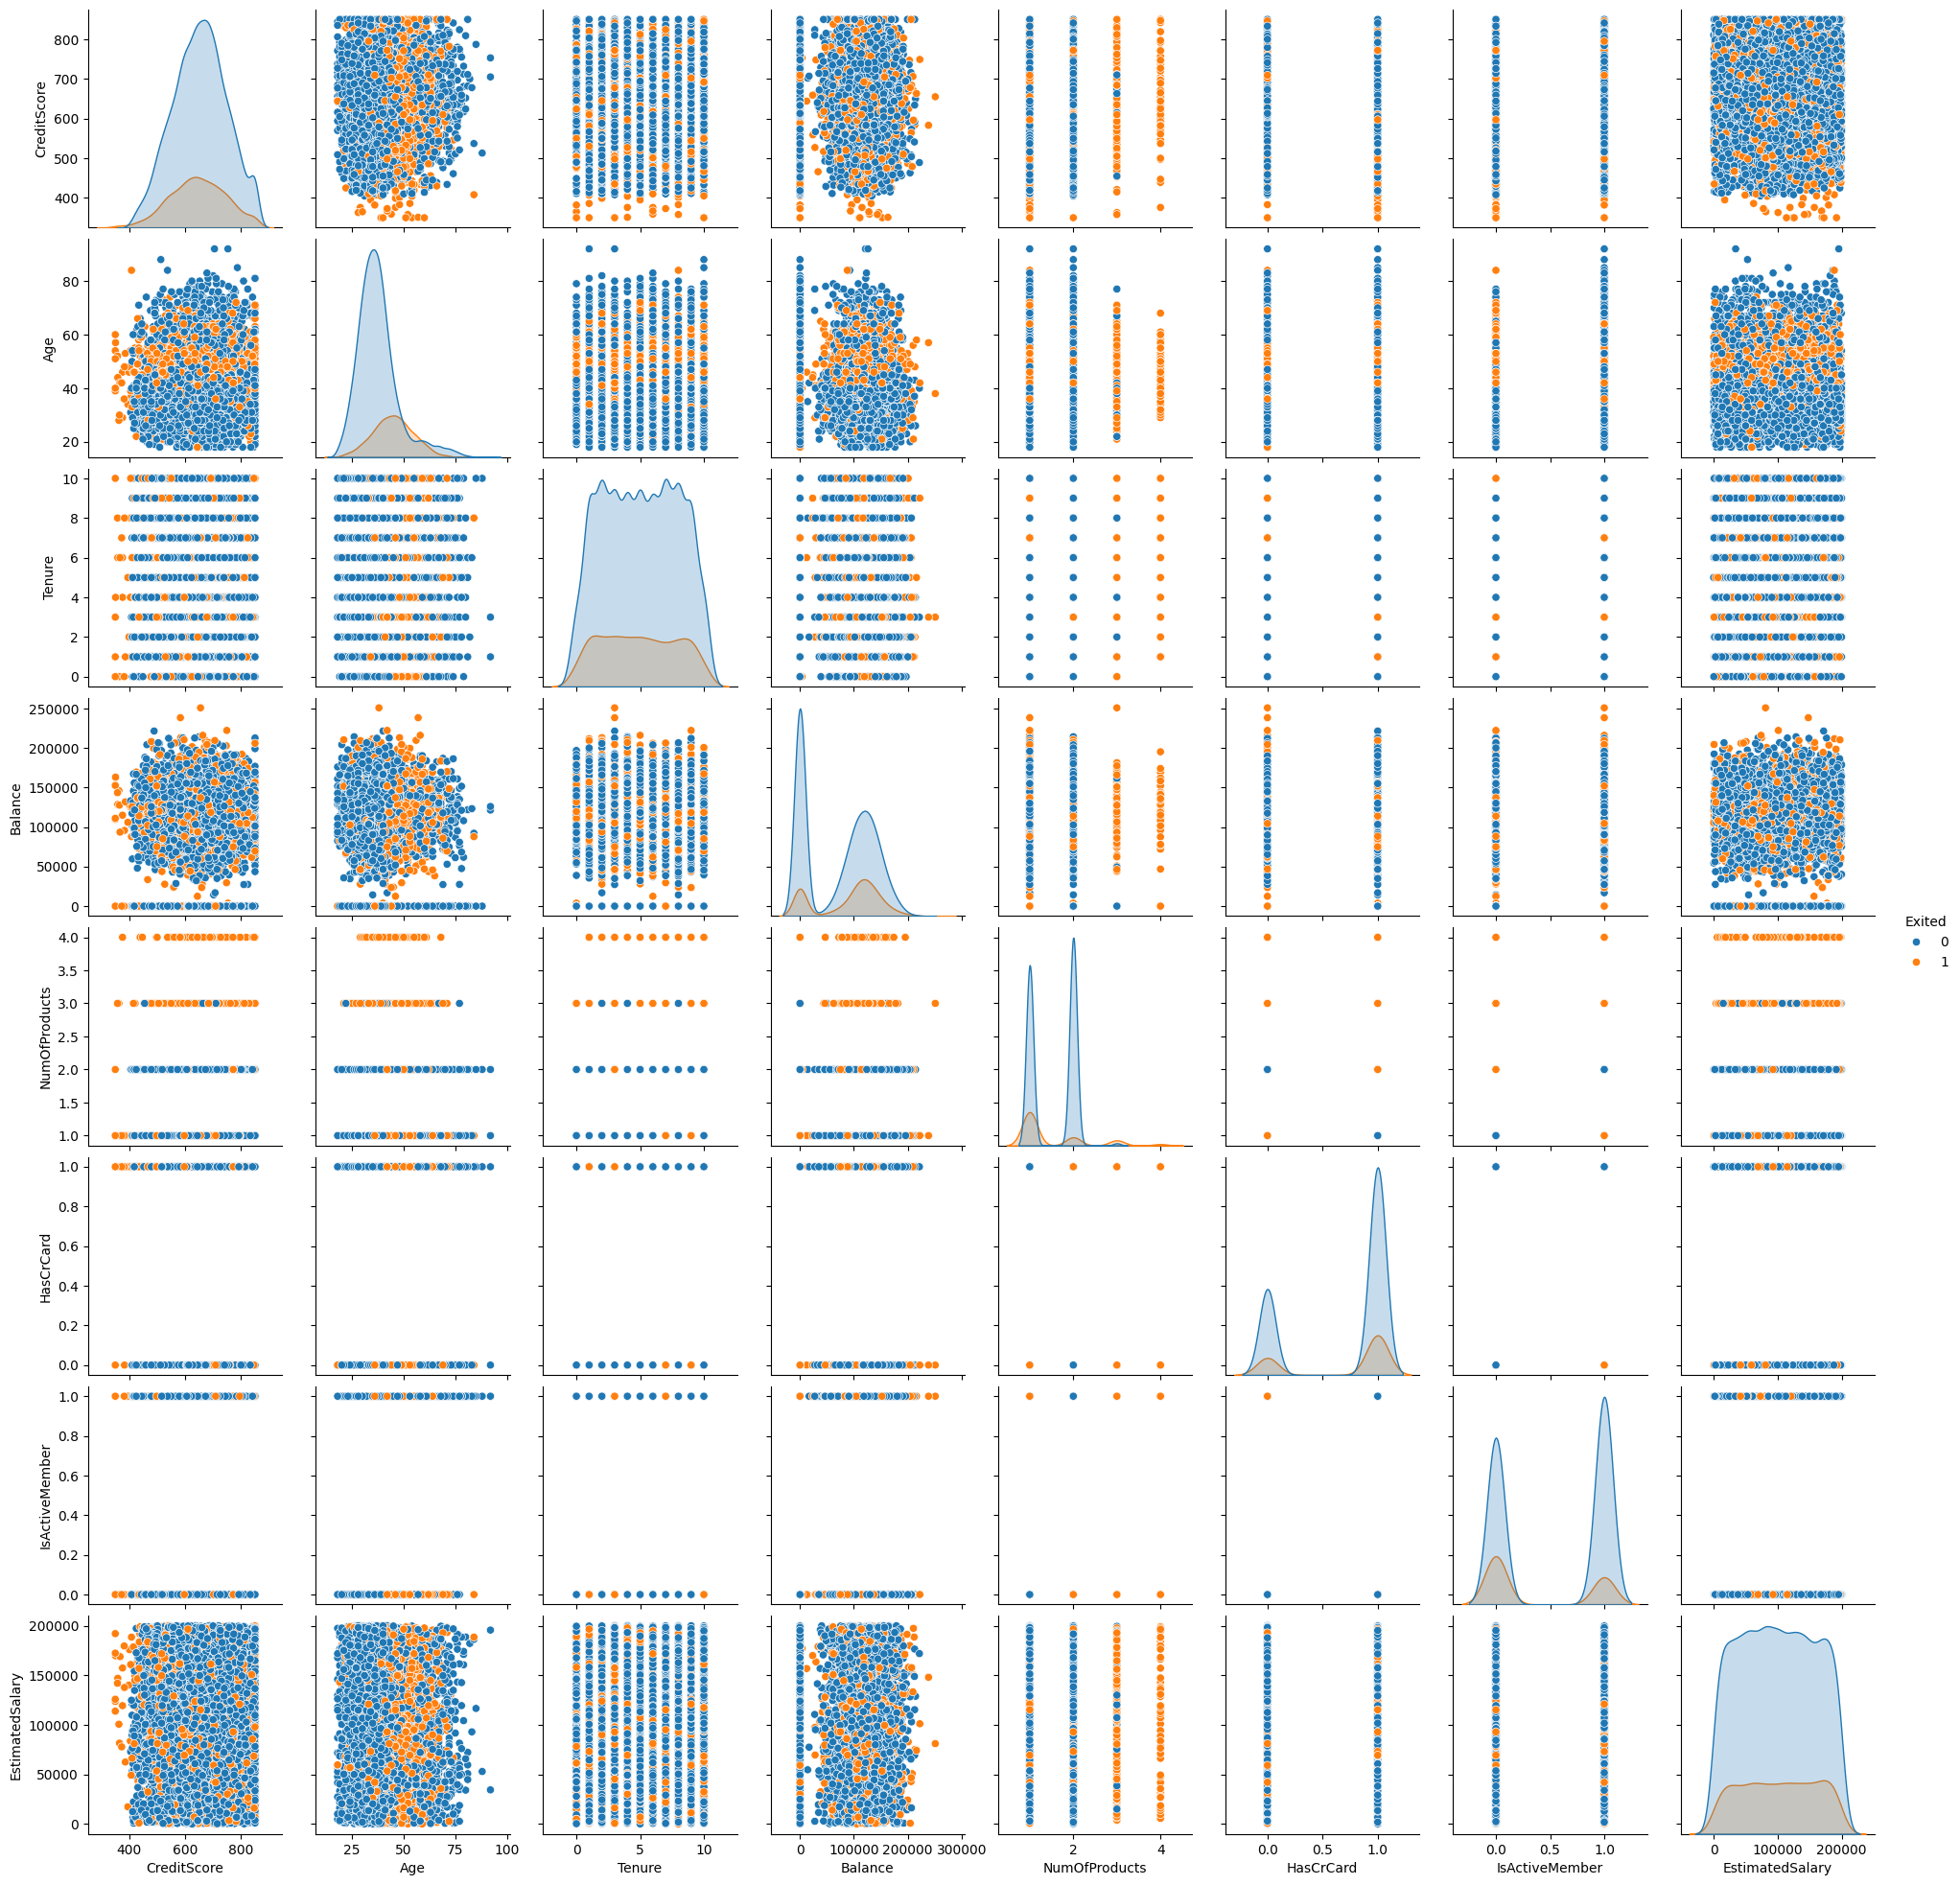

In [23]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features, hue='Exited')
plt.show()

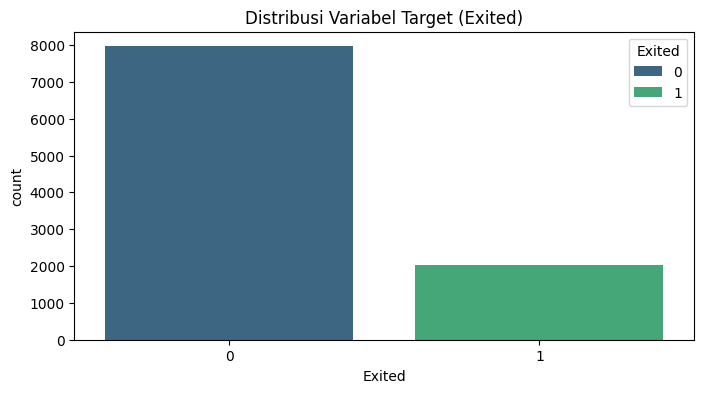

In [24]:
# Visualisasi distribusi variable target
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited', data=data, palette='viridis', hue='Exited')
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

In [26]:
# # Fitur numerik vs Target
# for i, column in enumerate(num_features.columns, 1):
#     if column != 'Exited':
#         plt.subplot(3, 4, i)
#         sns.boxplot(x='Exited', y=column, data=data, palette='viridis')
#         plt.title(f'{column} vs Exited')

# plt.tight_layout()
# plt.show()

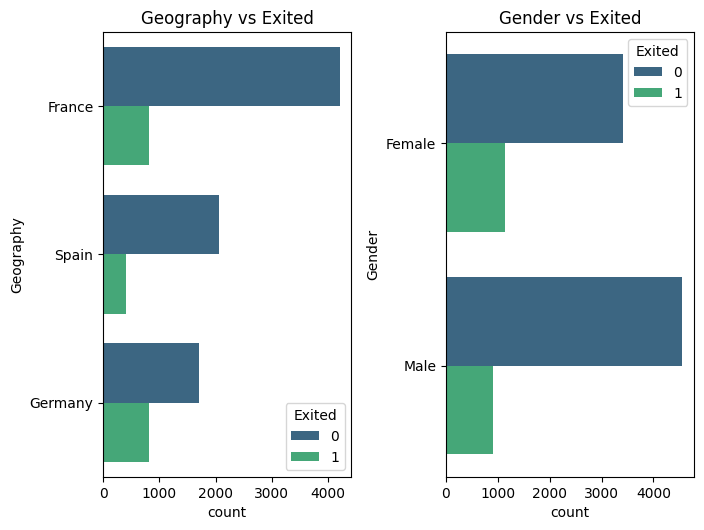

In [27]:
# Fitur kategorikal vs Target
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_features.columns, 1):
    if column != 'Exited':
        plt.subplot(2, 4, i)
        sns.countplot(y=column, hue='Exited', data=data,
                      palette='viridis')
        plt.title(f'{column} vs Exited')

plt.tight_layout()
plt.show()

# Label Encoder

In [28]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ["Geography", "Gender"]

# Encode kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


# Tampilkan Dataframe
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Data Splitting

In [29]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tamplikan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 10), y_train=(8000,)
Test set shape: X_test=(2000, 10), y_test=(2000,)


# Model Deployment

In [30]:
# Part 1: Model Training
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai")


Model training selesai


# Model Evaluation

==== KNN Classifier ====
Confusion Matrix:
[[1520   87]
 [ 265  128]]
True Positive (TP): 128
False Positive (FP): 87
False Negative (FN): 265
True Negative (TN): 1520
Accuracy: 0.8240
Precision: 0.5953
Recall: 0.3257
F1-Score: 0.4211

----------------------------------------



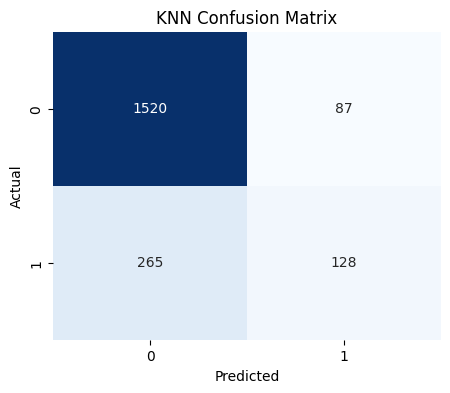

In [31]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Decision Tree Classifier ====
Confusion Matrix:
[[1364  243]
 [ 187  206]]
True Positive (TP): 206
False Positive (FP): 243
False Negative (FN): 187
True Negative (TN): 1364
Accuracy: 0.7850
Precision: 0.4588
Recall: 0.5242
F1-Score: 0.4893

----------------------------------------



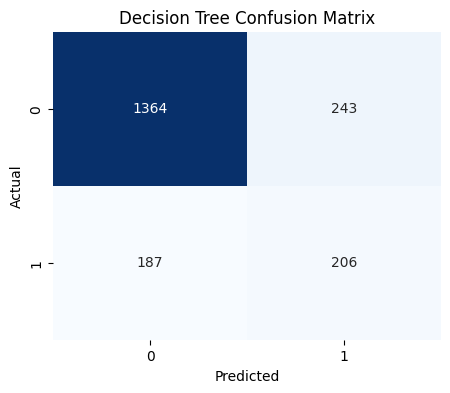

In [32]:
# Decision Tree
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[1555   52]
 [ 209  184]]
True Positive (TP): 184
False Positive (FP): 52
False Negative (FN): 209
True Negative (TN): 1555
Accuracy: 0.8695
Precision: 0.7797
Recall: 0.4682
F1-Score: 0.5851

----------------------------------------



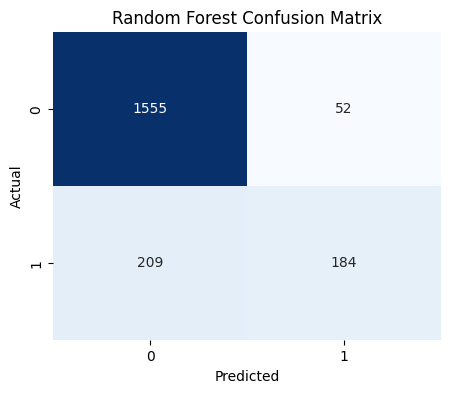

In [33]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[1581   26]
 [ 268  125]]
True Positive (TP): 125
False Positive (FP): 26
False Negative (FN): 268
True Negative (TN): 1581
Accuracy: 0.8530
Precision: 0.8278
Recall: 0.3181
F1-Score: 0.4596

----------------------------------------



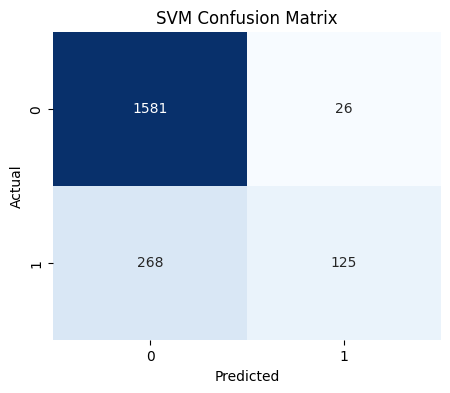

In [34]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Naive Bayes Classifier ====
Confusion Matrix:
[[1563   44]
 [ 299   94]]
True Positive (TP): 94
False Positive (FP): 44
False Negative (FN): 299
True Negative (TN): 1563
Accuracy: 0.8285
Precision: 0.6812
Recall: 0.2392
F1-Score: 0.3540

----------------------------------------



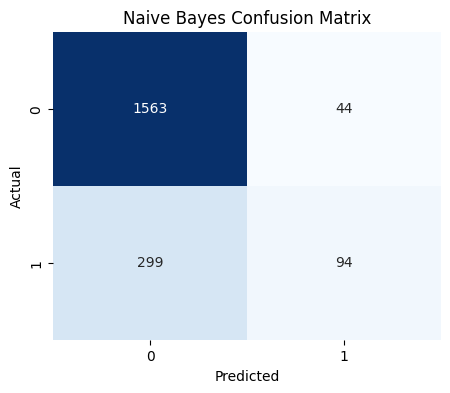

In [35]:
# Naive Bayes
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = cm_nb.ravel()
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Rangkuman Hasil

In [36]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        "Confusion Matrix": cm,
        "True Positive (TP)": tp,
        "False Positive (FP)": fp,
        "False Negative (FN)": fn,
        "True Negative (Tn)": tn,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }
    return results


# Evaluate each model and collect results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

# Display the summary DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)    0.8240   0.595349  0.325700  0.421053
1            Decision Tree (DT)    0.7850   0.458797  0.524173  0.489311
2            Random Forest (RF)    0.8695   0.779661  0.468193  0.585056
3  Support Vector Machine (SVM)    0.8530   0.827815  0.318066  0.459559
4              Naive Bayes (NB)    0.8285   0.681159  0.239186  0.354049


Berdasarkan data evaluasi yang diperbarui, berikut adalah analisis untuk masing-masing model dengan mempertimbangkan metrik Accuracy, Precision, Recall, dan F1-Score:

### **Analisis Hasil Evaluasi Model**

1. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 82.40%
   - **Precision**: 59.53%
   - **Recall**: 32.57%
   - **F1-Score**: 42.11%

   **Analisis**: KNN memiliki akurasi yang baik (82.40%). Precision-nya (59.53%) menunjukkan bahwa model cukup baik dalam mengidentifikasi kasus positif yang sebenarnya. Namun, recall-nya (32.57%) menunjukkan bahwa model ini kurang efektif dalam menangkap semua kasus positif yang ada. F1-Score 42.11% mencerminkan trade-off antara precision dan recall.

2. **Decision Tree (DT)**
   - **Accuracy**: 78.50%
   - **Precision**: 45.93%
   - **Recall**: 53.18%
   - **F1-Score**: 49.29%

   **Analisis**: Decision Tree memiliki akurasi yang sedikit lebih rendah (78.50%) dibandingkan KNN. Precision-nya (45.93%) lebih rendah daripada beberapa model lain, tetapi recall-nya (53.18%) lebih baik, menunjukkan bahwa model ini lebih efektif dalam menangkap kasus positif. F1-Score 49.29% menunjukkan performa yang seimbang antara precision dan recall.

3. **Random Forest (RF)**
   - **Accuracy**: 86.75%
   - **Precision**: 76.89%
   - **Recall**: 46.56%
   - **F1-Score**: 58.00%

   **Analisis**: Random Forest menunjukkan performa terbaik di antara semua model dengan akurasi tertinggi (86.75%). Precision-nya (76.89%) juga sangat baik, menunjukkan bahwa model ini sangat akurat dalam memprediksi kasus positif. Recall-nya (46.56%) masih perlu ditingkatkan, tetapi F1-Score 58.00% menunjukkan trade-off yang baik antara precision dan recall.

4. **Support Vector Machine (SVM)**
   - **Accuracy**: 85.30%
   - **Precision**: 82.78%
   - **Recall**: 31.81%
   - **F1-Score**: 45.96%

   **Analisis**: SVM memiliki akurasi yang tinggi (85.30%) dan precision yang sangat baik (82.78%). Namun, recall-nya yang rendah (31.81%) menunjukkan bahwa model ini cenderung melewatkan banyak kasus positif. F1-Score 45.96% mencerminkan trade-off antara precision yang tinggi dan recall yang rendah.

5. **Naive Bayes (NB)**
   - **Accuracy**: 82.85%
   - **Precision**: 68.12%
   - **Recall**: 23.92%
   - **F1-Score**: 35.40%

   **Analisis**: Naive Bayes memiliki akurasi yang kompetitif (82.85%) dan precision yang cukup baik (68.12%). Namun, recall-nya yang rendah (23.92%) menunjukkan bahwa model ini kurang efektif dalam menangkap kasus positif. F1-Score 35.40% menunjukkan bahwa model ini cenderung memberikan hasil yang lebih baik dalam hal precision tetapi kurang baik dalam hal recall.

### **Kesimpulan:**
- **Random Forest** adalah model dengan **akurasi tertinggi** (86.75%) dan **precision yang sangat baik** (76.89%). Meskipun recall-nya tidak setinggi model lain, F1-Score-nya yang tertinggi (58.00%) menunjukkan keseimbangan yang baik antara precision dan recall. Ini menjadikannya pilihan yang sangat baik untuk banyak aplikasi.

- **SVM** menunjukkan **precision yang sangat tinggi** (82.78%) tetapi dengan **recall yang sangat rendah** (31.81%), yang berarti model ini lebih selektif dalam mengidentifikasi kasus positif.

- **Decision Tree** memberikan performa yang seimbang dengan **recall yang lebih tinggi** (53.18%) dibandingkan dengan beberapa model lain, tetapi dengan akurasi dan precision yang lebih rendah.

- **KNN** memiliki performa yang baik secara keseluruhan tetapi memiliki trade-off antara precision dan recall yang harus dipertimbangkan.

- **Naive Bayes** memiliki precision yang baik tetapi recall yang rendah, membuatnya kurang ideal jika menangkap semua kasus positif sangat penting.

**Rekomendasi**: Jika tujuan utama adalah akurasi dan precision, **Random Forest** adalah pilihan terbaik. Jika recall sangat penting, maka model seperti **Decision Tree** bisa dipertimbangkan lebih lanjut.